## REQUIREMENTS

### Install the required libraries

- pykan
- torchvision

In [ ]:
%pip install pykan
%pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
#first example
from kan import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#second example
from kan import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

### Support functions

- fit_plot: plot the train loss and the test loss
- plot_correlation: true label vs predicted labels
- get data: to obtain the dataset in the correct form
- plot_confusion: plot the confusion matrix


In [ ]:
def plot_fit(fit):
    train_loss = [float(val) for val in fit['train_loss']]
    test_loss = [float(val) for val in fit['test_loss']]
    reg = [float(val) for val in fit['reg']]

    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='Train Loss', marker='o')
    plt.plot(test_loss, label='Test Loss', marker='o')

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Metrics Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_correlation(model,dataset):
    train_pred = model(dataset['train_input']).detach().numpy()
    test_pred = model(dataset['test_input']).detach().numpy()

    fig, axes = plt.subplots(1,2, figsize=(11,5))

    axes[0].scatter(dataset['train_label'], train_pred, label="train")
    axes[0].plot([0,7],[0,7], color='red')
    axes[0].set_xlabel('True Labels')
    axes[0].set_ylabel('Predicted Labels')
    axes[0].set_title('Scatter Plot - Training Data')
    axes[0].legend()
    axes[0].grid(True)

    axes[1].scatter(dataset['test_label'], test_pred, label="test")
    axes[1].plot([0,7],[0,7], color='red')
    axes[1].set_xlabel('True Labels')
    axes[1].set_ylabel('Predicted Labels')
    axes[1].set_title('Scatter Plot - Test Data')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
def get_data(test_split=0.2,random_state=42,device="cpu",is_regression=False):
    dataset = load_breast_cancer()
    print(f"Dataset data shape: {dataset.data.shape} and dataset target shape: {dataset.target.shape}")

    y_shape = dataset.target.shape
    target  = dataset.target
    if not is_regression:
        if len(y_shape)<2:
            N = len(dataset.target)
            unique_values = np.unique(dataset.target)
            unique_dic = {_:i for i,_ in enumerate(unique_values)}
            encoded = np.zeros((N, len(unique_values)), dtype=int)
            for i, value in enumerate(dataset.target):
                encoded[i, unique_dic[value]] = 1
                target = encoded

    X_train, X_test, y_train, y_test = train_test_split(dataset.data,target, test_size=test_split, random_state=random_state)
    mean = X_train.mean(0)
    std =  X_train.std(0)
    X_train = (X_train - mean)/std
    X_test = (X_test - mean)/std

    dataset ={'train_input':X_train ,'train_label':y_train ,'test_input':X_test ,'test_label':y_test}
    for k,v in dataset.items():
        dataset[k] = torch.tensor(v,dtype=torch.float32).to(device)

    print(f"Dataset Imported")
    return dataset

In [ ]:
def plot_confusion_accuracy(model,dataset):
    train_true = dataset['train_label'].argmax(1)
    train_pred = model(dataset['train_input']).cpu().detach().numpy().round().argmax(1)
    cm_train = confusion_matrix(train_true, train_pred)
    test_true = dataset['test_label'].argmax(1)
    test_pred = model(dataset['test_input']).cpu().detach().numpy().round().argmax(1)
    cm_test = confusion_matrix(test_true, test_pred)

    train_accuracy = accuracy_score(train_true, train_pred)
    test_accuracy = accuracy_score(test_true, test_pred)

    print("ACCURACY")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")

    print("Confusion Matrix - Training Data and Test Data")
    fig, axes = plt.subplots(1,2, figsize=(10,6))

    plt.subplot(1,2, 1)
    sns.set(font_scale=1.2)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Training Data')

    plt.subplot(1,2, 2)
    sns.set(font_scale=1.2)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - Test Data')

    plt.tight_layout()
    plt.show()

# KAN: Kolmogorov Arnold Network - REGRESSION EXAMPLE

## KAN Model
Create a KAN model with the specified hyperparameters:

- L = 3: This indicates the number of layers in the network.
- N = [2, 5, 1]: This specifies the number of neurons in each layer:
    - 2: Number of input neurons (2D input).
    - 5: Number of neurons in the hidden layer.
    - 1: Number of output neurons (1D output).
- k = 3: This specifies that we are using cubic splines (degree 3) for the hidden layer activations.
- G = 5: This defines the number of grid intervals (5 intervals) for the knots in the input space.

Using the function ` KAN(width,grid,k,seed) `

In [ ]:
width = [2,5,1]
grid = 5
k = 3
seed = 0

model = KAN(width=width, grid=grid, k=k, seed=seed)

checkpoint directory created: ./model
saving model version 0.0


## KAN Dataset

create the dataset on the function $f$:

$$ f(x,y) = e^{\sin(\pi x) + y^2}$$

In [ ]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

dataset = create_dataset(f, n_var=2)
print("Dataset input shape:", dataset['train_input'].shape)
print("Dataset output shape:", dataset['train_label'].shape)

Dataset input shape: torch.Size([1000, 2])
Dataset output shape: torch.Size([1000, 1])


Plot the network

Model initalized


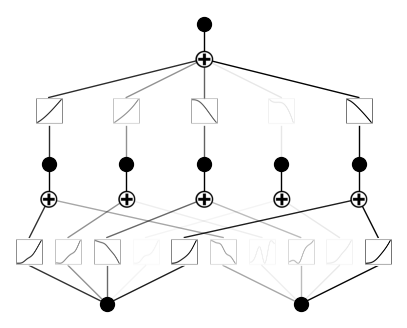

In [ ]:
model(dataset['train_input']);
print("Model initalized")
model.plot()

## KAN Training with Regularization

Train the KAN on the dataset using:
- Optimization Algorithm: L-BFGS (a second-order optimization method).
- Steps: 20 iterations.
- Sparsity Regularization:
    - lambda (lamb): Regularization parameter set to 0.01.
    - Entropy (lamb_entropy): Regularization parameter for entropy set to 10.

Using the function:  ` model.fit(dataset, opt, steps, lamb, lamb_entropy) `

| train_loss: 1.76e-01 | test_loss: 1.77e-01 | reg: 1.89e+01 | : 100%|█| 50/50 [00:28<00:00,  1.74it


saving model version 0.1


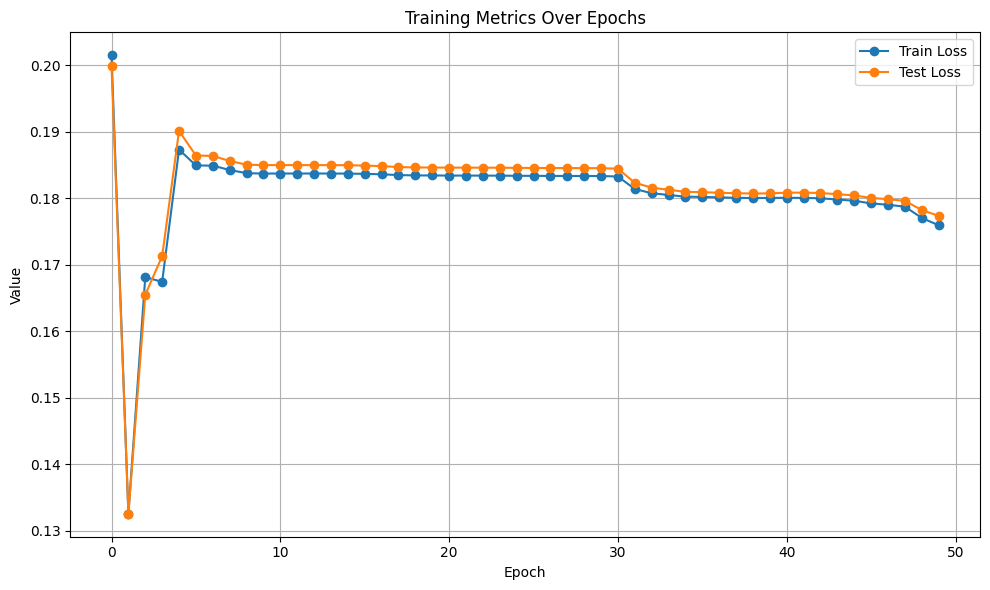

In [ ]:
opt = "LBFGS"
steps = 50
lamb = 0.01
lamb_entropy = 10.

fit = model.fit(dataset, opt=opt, steps=steps, lamb=lamb, lamb_entropy=lamb_entropy)
plot_fit(fit)

Model trained using LBFGS with 50 steps
Regularization parameters: lambda = 0.01, lambda_entropy = 10.0


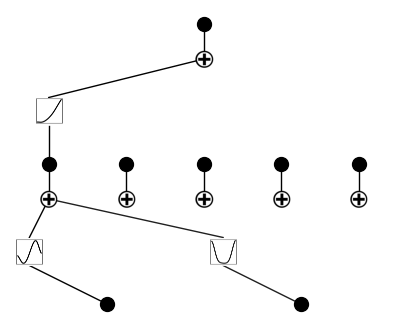

In [ ]:
print(f"Model trained using {opt} with {steps} steps")
print(f"Regularization parameters: lambda = {lamb}, lambda_entropy = {lamb_entropy}")
model.plot()

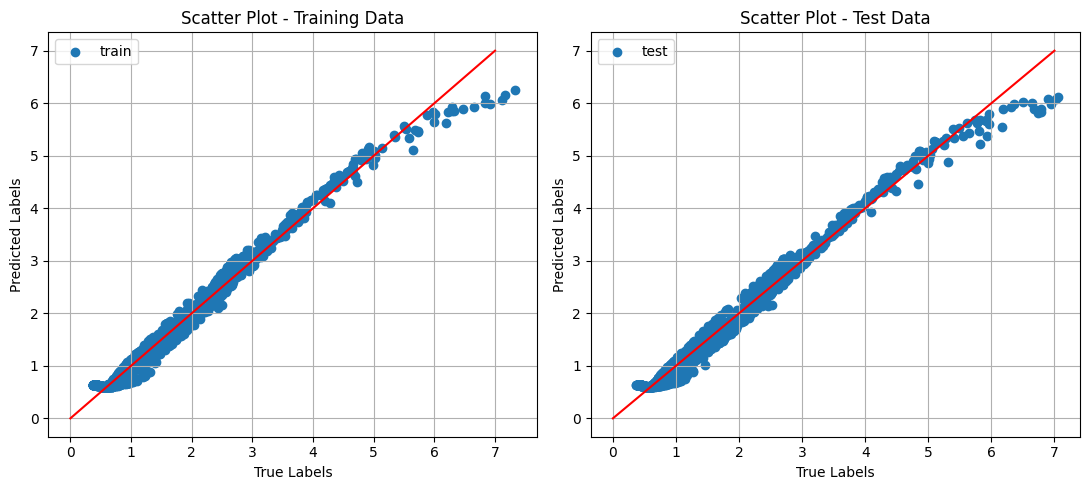

In [ ]:
plot_correlation(model,dataset)

## KAN Pruning

Prune the KAN network using the prune function: ` model.prune() `

Then re-train the model to increase accuracy

saving model version 0.2
Model pruned


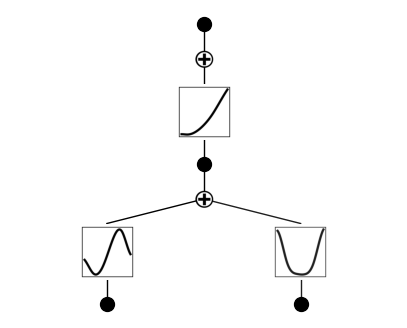

In [ ]:
model = model.prune()
print("Model pruned")
model.plot()

| train_loss: 7.30e-03 | test_loss: 7.25e-03 | reg: 7.64e+00 | : 100%|█| 50/50 [00:04<00:00, 11.12it


saving model version 0.3


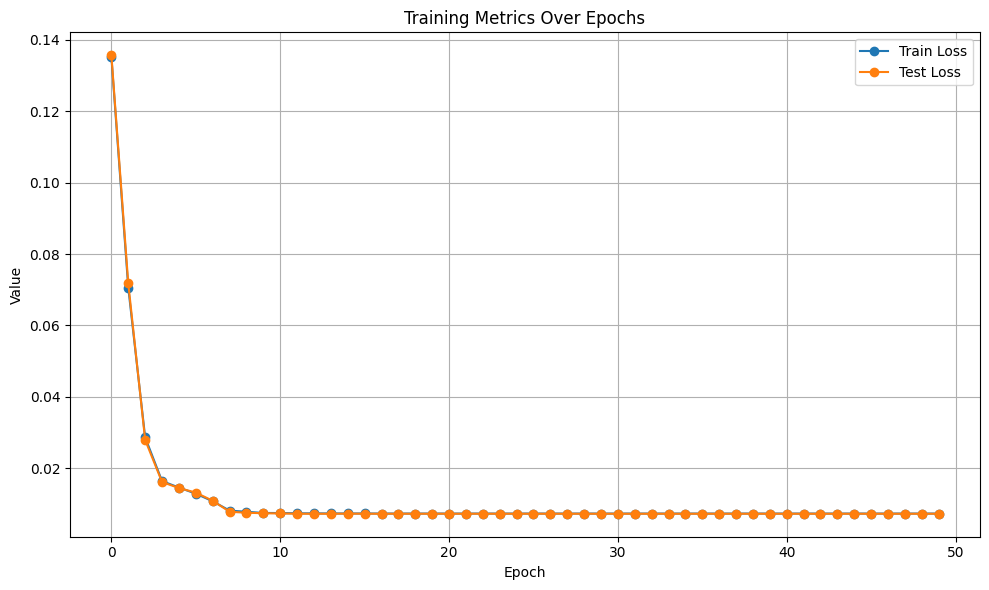

In [ ]:
fit = model.fit(dataset, opt=opt, steps=steps)
plot_fit(fit)

Model re-trained after pruning using LBFGS with 50 steps


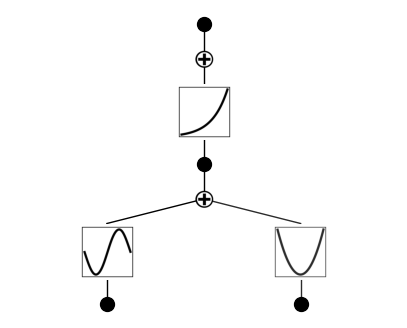

In [ ]:
print(f"Model re-trained after pruning using {opt} with {steps} steps")
model.plot()

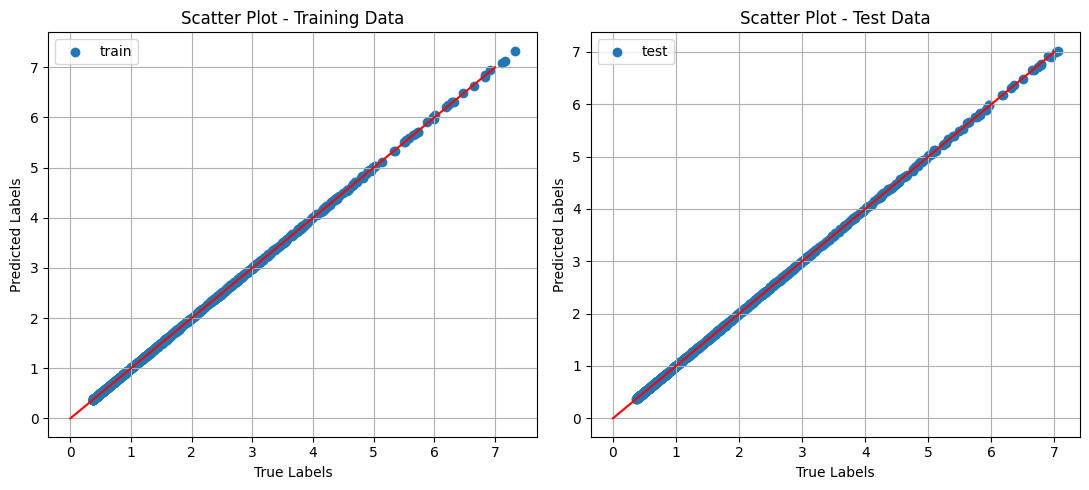

In [ ]:
plot_correlation(model,dataset)

## KAN Symbolic Regression

Use Automatic symbolic regression giving a set of functions in a library.

Using the function: ` model.auto_symbolic(lib) `

Then re-train the model to increase accuracy and plot the symbolic formula

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
print(f"Symbolic regression using {lib} libray")
model.auto_symbolic(lib=lib)

Symbolic regression using ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs'] libray
fixing (0,0,0) with sin, r2=0.9999722838401794, c=2
fixing (0,1,0) with x^2, r2=0.9999991655349731, c=2
fixing (1,0,0) with exp, r2=0.9999991655349731, c=2
saving model version 0.4


Symbolic regression model


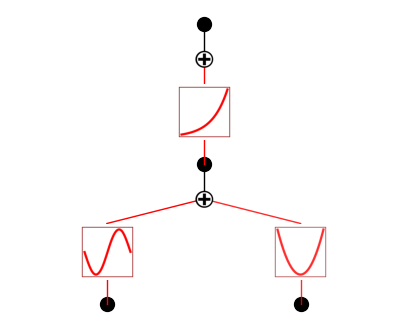

In [ ]:
print(f"Symbolic regression model")
model.plot()

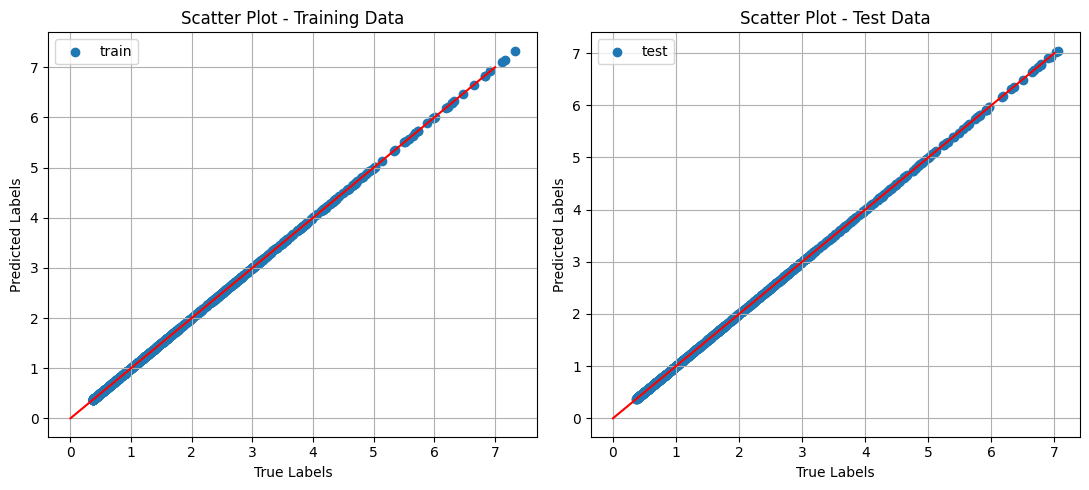

In [ ]:
plot_correlation(model,dataset)

In [ ]:
print(f"Symbolic formula")
ex_round(model.symbolic_formula()[0][0],2)

Symbolic formula


1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))

# KAN: Kolmogorov Arnold Network - CANCER ANALISYS

##CANCER DATASET

Import the cancer dataset *load_breast_cancer*  from *sklearn.datasets* and format properly.

Then divide it in train and test sets.

In [ ]:
dataset = get_data(test_split=0.2)

Dataset data shape: (569, 30) and dataset target shape: (569,)
Dataset Imported


## CANCER MODEL
Create a KAN model with the specified hyperparameters:

- L = 3: This indicates the number of layers in the network.
- N = [30, 4, 2]: This specifies the number of neurons in each layer.
- k = 3: This specifies that we are using cubic splines.
- G = 3: This defines the number of grid intervals.

Using the function ` KAN(width,grid,k,seed) `

In [ ]:
width = [30, 4, 2]
grid = 3
k = 3

model_cancer = KAN(width=width, grid=grid, k=k)

checkpoint directory created: ./model
saving model version 0.0


In [ ]:
print("Dataset input shape:", dataset['train_input'].shape)
print("Dataset output shape:", dataset['train_label'].shape)

Dataset input shape: torch.Size([455, 30])
Dataset output shape: torch.Size([455, 2])


## CANCER TRAINING

Train the KAN on the dataset using:
- Optimization Algorithm: L-BFGS (a second-order optimization method).
- Steps: 20 iterations.
- Sparsity Regularization:
    - lambda (lamb): Regularization parameter set to 0.01.
    - Entropy (lamb_entropy): Regularization parameter for entropy set to 10.

- Learning rate at 0.01
- Cross entropy as loss funtion

Using the function:  ` model.fit(dataset, opt, steps, lamb, lamb_entropy, lr, loss_fn) `

| train_loss: 3.78e-01 | test_loss: 3.41e-01 | reg: 4.00e+01 | : 100%|█| 20/20 [00:15<00:00,  1.28it


saving model version 0.1


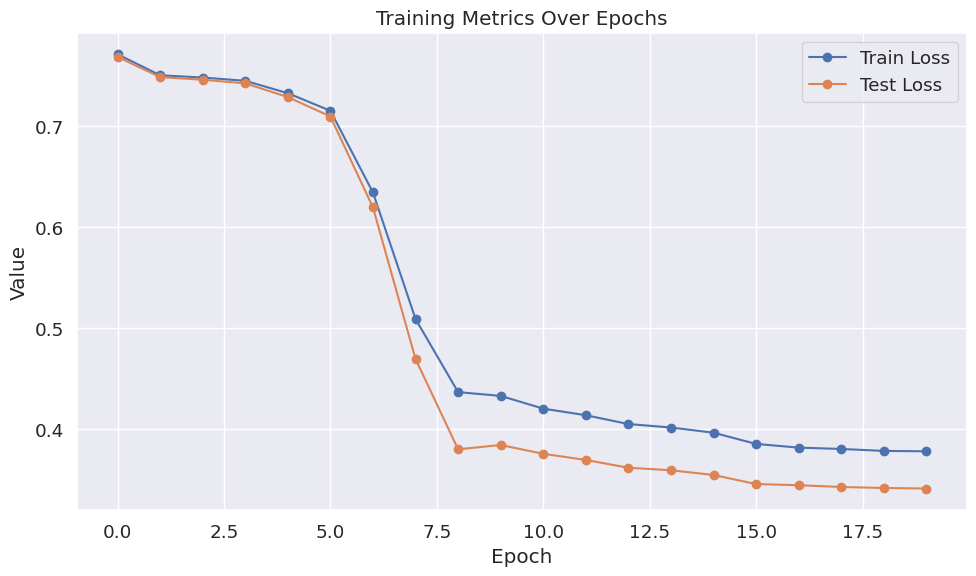

In [ ]:
opt = "LBFGS"
steps = 20
lamb = 0.01
lamb_entropy = 10.
lr = 0.01
loss_fn = torch.nn.CrossEntropyLoss()

fit = model_cancer.fit(dataset, opt=opt, steps=steps, lamb=lamb, lamb_entropy=lamb_entropy, lr=lr, loss_fn=loss_fn)
plot_fit(fit)

Model trained using LBFGS with 20 steps
Regularization parameters: lambda = 0.01, lambda_entropy = 10.0
Learning rate: 0.01


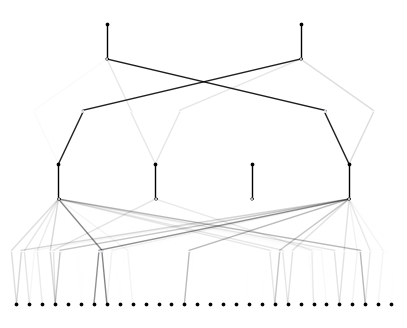

In [ ]:
print(f"Model trained using {opt} with {steps} steps")
print(f"Regularization parameters: lambda = {lamb}, lambda_entropy = {lamb_entropy}")
print(f"Learning rate: {lr}")
model_cancer.plot()

## CANCER RESULT AFTER TRAINING

- Plot the confusion matrix of the training set and the test set

- Compute the accuracy of the training set and the test set

ACCURACY
Training Accuracy: 0.9472527472527472
Test Accuracy: 0.956140350877193
Confusion Matrix - Training Data and Test Data


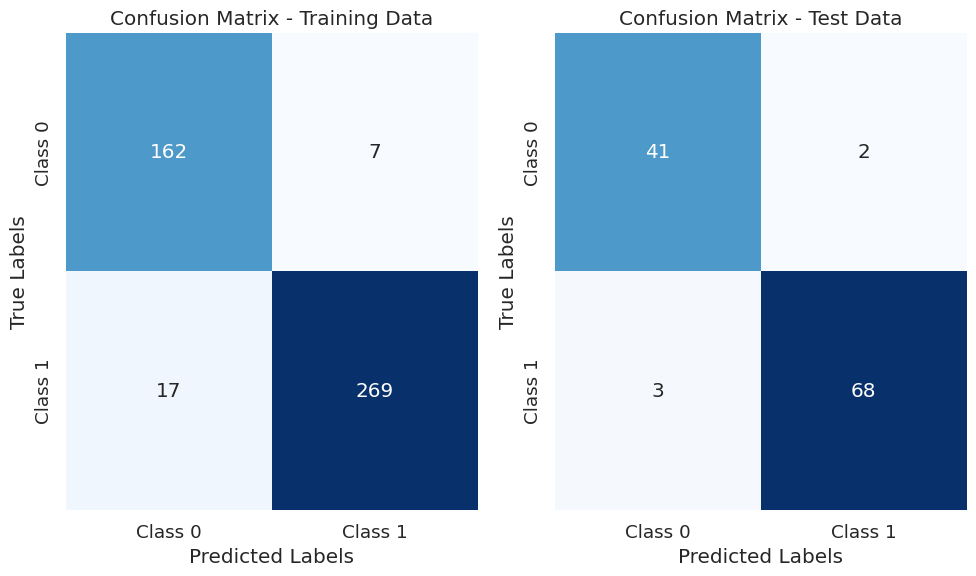

In [ ]:
plot_confusion_accuracy(model_cancer,dataset)

## CANCER PRUNING

Prune the KAN network using the prune function: ` model.prune() `

Then re-train the model to increase accuracy

In [ ]:
model_cancer_pruned = model_cancer.prune()

saving model version 0.2


| train_loss: 2.81e-01 | test_loss: 2.55e-01 | reg: 2.14e+01 | : 100%|█| 20/20 [00:06<00:00,  2.88it


saving model version 0.3


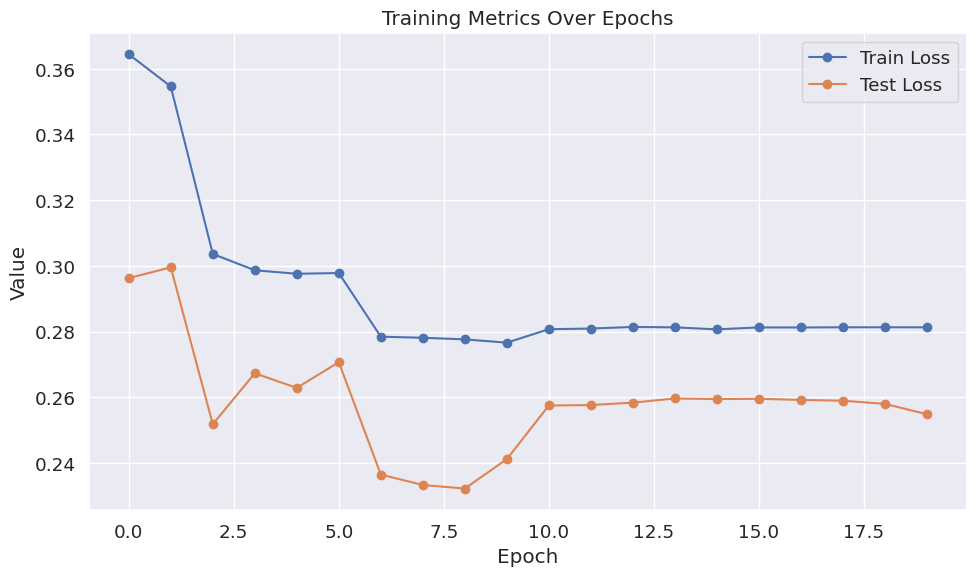

In [ ]:
opt = "LBFGS"
steps = 20
lamb = 0.01
lamb_entropy = 10.
lr = 0.01
device = "cpu"
loss_fn = torch.nn.CrossEntropyLoss()

fit = model_cancer_pruned.fit(dataset, opt=opt, steps=steps, lamb=lamb, lamb_entropy=lamb_entropy, lr=lr, loss_fn=loss_fn)
plot_fit(fit)

Model re-trained after pruning using LBFGS with 20 steps
Regularization parameters: lambda = 0.01, lambda_entropy = 10.0
Learning rate: 0.01


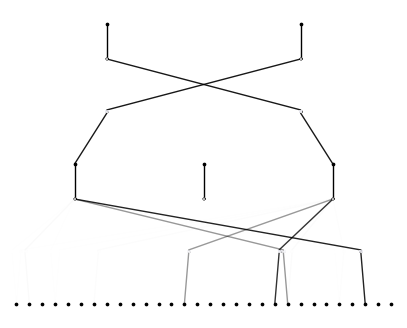

In [ ]:
print(f"Model re-trained after pruning using {opt} with {steps} steps")
print(f"Regularization parameters: lambda = {lamb}, lambda_entropy = {lamb_entropy}")
print(f"Learning rate: {lr}")
model_cancer_pruned.plot()

## CANCER RESULT AFTER PRUNING

- Plot the confusion matrix of the training set and the test set

- Compute the accuracy of the training set and the test set

ACCURACY
Training Accuracy: 0.9736263736263736
Test Accuracy: 0.9736842105263158
Confusion Matrix - Training Data and Test Data


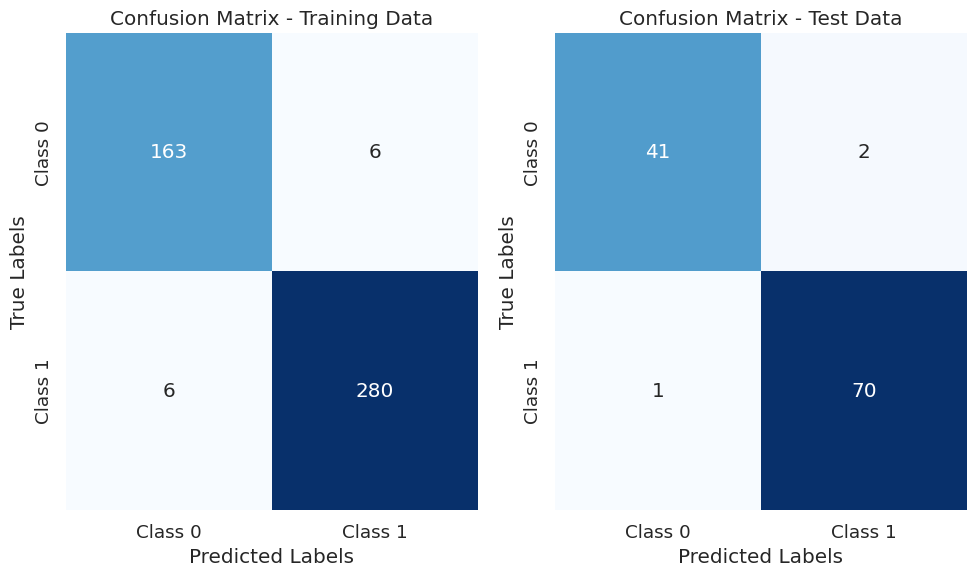

In [ ]:
plot_confusion_accuracy(model_cancer_pruned,dataset)

## CANCER SYMBOLIC REGRESSION
Use Automatic symbolic regression giving a set of functions in a library.

Using the function: ` model.auto_symbolic(lib) `

With this dataset we dont't notice a great advantage using symbolic regression

In [ ]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model_cancer_pruned.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.025414075702428818, c=1
fixing (0,0,1) with 0
fixing (0,0,2) with x, r2=0.09903199225664139, c=1
fixing (0,1,0) with x, r2=0.36733388900756836, c=1
fixing (0,1,1) with 0
fixing (0,1,2) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,2,2) with 0
fixing (0,3,0) with x, r2=0.0023220747243613005, c=1
fixing (0,3,1) with x, r2=0.015583895146846771, c=1
fixing (0,3,2) with x, r2=0.28801053762435913, c=1
fixing (0,4,0) with 0
fixing (0,4,1) with 0
fixing (0,4,2) with 0
fixing (0,5,0) with 0
fixing (0,5,1) with 0
fixing (0,5,2) with 0
fixing (0,6,0) with 0
fixing (0,6,1) with 0
fixing (0,6,2) with x, r2=0.003945337142795324, c=1
fixing (0,7,0) with x, r2=0.13994437456130981, c=1
fixing (0,7,1) with 0
fixing (0,7,2) with 0
fixing (0,8,0) with 0
fixing (0,8,1) with 0
fixing (0,8,2) with 0
fixing (0,9,0) with 0
fixing (0,9,1) with 0
fixing (0,9,2) with 0
fixing (0,10,0) with 0
fixing (0,10,1) with 0
fixing (0,10,2) with 0
fixing (0,11,0) with 0
fixing (0,1

In [ ]:
print(f"Symbolic formula")
ex_round(model_cancer_pruned.symbolic_formula()[0][0],2)

Symbolic formula


1.59 - 0.39*exp(-0.45*x_14 - 2.94*sin(0.48*x_21 + 5.23))

## CANCER RESULT AFTER SYMBOLIC REGRESSION

- Plot the confusion matrix of the training set and the test set

- Compute the accuracy of the training set and the test set

ACCURACY
Training Accuracy: 0.9714285714285714
Test Accuracy: 0.9824561403508771
Confusion Matrix - Training Data and Test Data


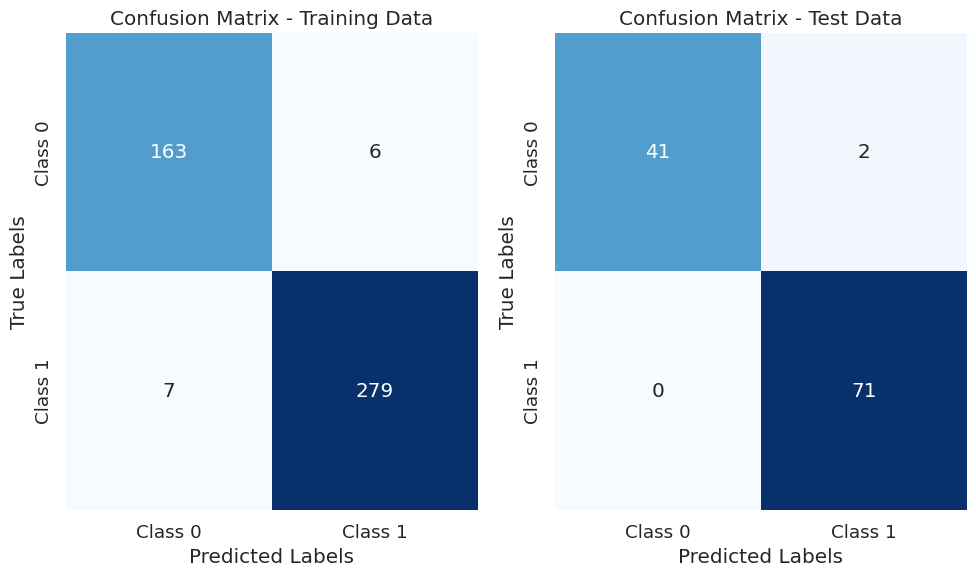

In [ ]:
plot_confusion_accuracy(model_cancer_pruned,dataset)